# Fig 1.09 Hodgkin-Huxley model

In [1]:
using DifferentialEquations
using ModelingToolkit
using Plots
Plots.gr(lw=2)

Plots.GRBackend()

In [2]:
# Convenience functions
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)
exprel(x) = x / expm1(x)

exprel (generic function with 1 method)

In [3]:
# Build the model

@parameters E_N E_K E_LEAK G_N_BAR G_K_BAR G_LEAK C_M
@variables t v(t) m(t) h(t) n(t) mα(t) mβ(t) hα(t) hβ(t) nα(t) nβ(t) iNa(t) iK(t) iLeak(t) iStim(t)

D = Differential(t)

(::Differential) (generic function with 2 methods)

In [4]:
# Time-dependent force
get_istim(t) = ifelse(20<=t<=21, -6.8, ifelse(60<=t<=61, -7.0, 0.0))

@register get_istim(t)

In [5]:
@named hhSys = ODESystem(
   [mα  ~ exprel(-0.10 * (v + 35)),
    mβ  ~ 4.0 * exp(-(v + 60) / 18.0),
    hα  ~ 0.07 * exp(- ( v + 60) / 20),
    hβ  ~ 1 / (exp(-(v+30)/10) + 1),
    nα  ~ 0.1 * exprel(-0.1 * (v+50)),
    nβ  ~ 0.125 * exp( -(v+60) / 80),
    iNa ~ G_N_BAR * (v - E_N) * (m^3) * h,
    iK  ~ G_K_BAR * (v - E_K) * (n^4),
    iLeak ~ G_LEAK * (v - E_LEAK),
    iStim ~ get_istim(t),
    D(v) ~ -(iNa + iK + iLeak + iStim) / C_M,
    D(m) ~ -(mα + mβ) * m + mα,
    D(h) ~ -(hα + hβ) * h + hα,
    D(n) ~ -(nα + nβ) * n + nα]
)

Model hhSys with 14 equations
States (14):
  v(t)
  m(t)
  h(t)
  n(t)
  mα(t)
  mβ(t)
⋮
Parameters (7):
  E_N
  G_N_BAR
  G_K_BAR
  E_K
  G_LEAK
  E_LEAK
⋮

In [6]:
hhSys = structural_simplify(hhSys)

Model hhSys with 4 equations
States (4):
  v(t)
  m(t)
  h(t)
  n(t)
Parameters (7):
  E_N
  G_N_BAR
  G_K_BAR
  E_K
  G_LEAK
  E_LEAK
⋮
Incidence matrix:
 ×  ⋅  ⋅  ⋅  ×  ×  ×  ×
 ⋅  ×  ⋅  ⋅  ×  ×  ⋅  ⋅
 ⋅  ⋅  ×  ⋅  ×  ⋅  ×  ⋅
 ⋅  ⋅  ⋅  ×  ×  ⋅  ⋅  ×

In [7]:
params = [  E_N => 55.0,       # Reversal potential of Na (mV)
            E_K => -72.0,      # Reversal potential of K (mV)
            E_LEAK => -49.0,   # Reversal potential of leaky channels (mV)
            G_N_BAR => 120.0,  # Max. Na channel conductance (mS/cm^2)
            G_K_BAR => 36.0,   # Max. K channel conductance (mS/cm^2)
            G_LEAK => 0.30,    # Max. leak channel conductance (mS/cm^2)
            C_M => 1.0]        # membrane capacitance (uF/cm^2)

u0 = [v => -59.8977, m => 0.0536, h => 0.5925, n => 0.3192]
tend = 100.0

100.0

In [8]:
prob = ODEProblem(hhSys, u0, tend, params, jac=true)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: 4-element Vector{Float64}:
 -59.8977
   0.0536
   0.5925
   0.3192

In [9]:
sol = solve(prob, tstops=[20, 60])

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 201-element Vector{Float64}:
   0.0
   0.28649552814013246
   0.6282062901208554
   1.129278055899384
   1.7885396222404344
   2.728033408123967
   3.822572415062088
   4.838119173564754
   5.700042645198015
   6.449974946612389
   7.151326501296179
   7.850497467823436
   8.569189447525273
   ⋮
  79.93255405964989
  80.75644465757689
  81.675810816552
  82.74094410541343
  84.0857071034443
  86.2288391101619
  87.51709058500892
  89.72458395527511
  91.83175296168837
  94.8883386718368
  97.14069699975911
 100.0
u: 201-element Vector{Vector{Float64}}:
 [-59.8977, 0.0536, 0.5925, 0.3192]
 [-59.896772589630615, 0.05358478178533264, 0.592500685682472, 0.3192027439091019]
 [-59.89607841753646, 0.05358354985039719, 0.5925003853539127, 0.31920656870931335]
 [-59.89538070381037, 0.053587320705319214, 0.5924985631919883, 0.3192127047922289]
 [-59.8948271033

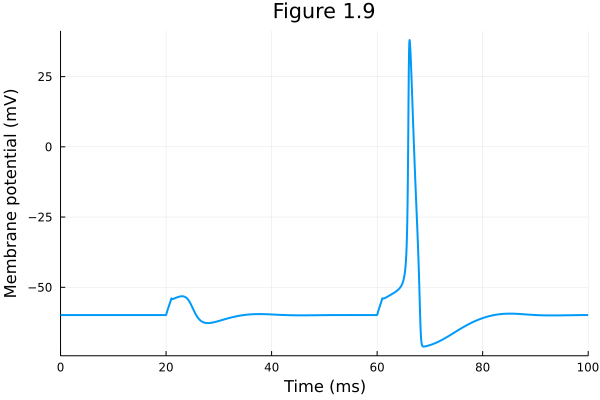

In [10]:
plot(sol, vars=(t, v),
     ylabel="Membrane potential (mV)", xlabel="Time (ms)", 
     legend=false, title="Figure 1.9")

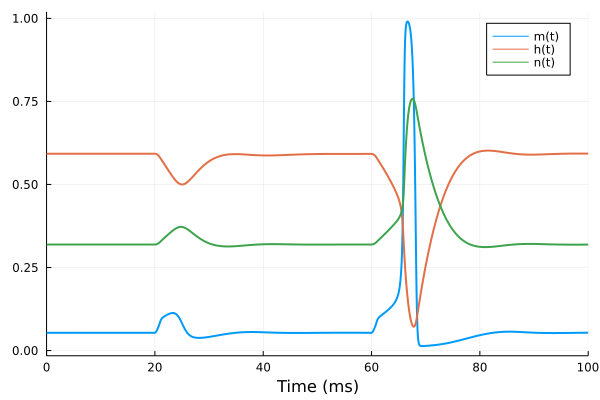

In [11]:
plot(sol, vars = [m, h, n], xlabel="Time (ms)")

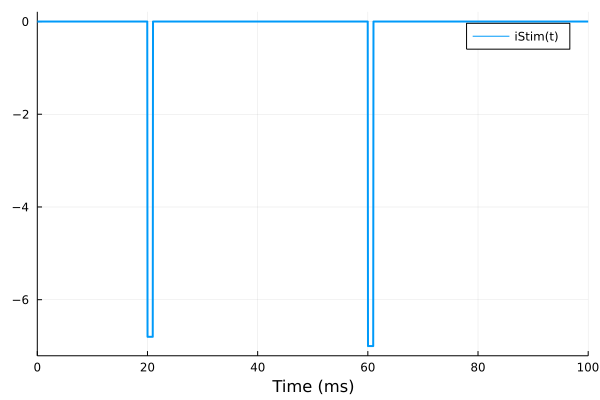

In [12]:
plot(sol, vars = [iStim], xlabel="Time (ms)")